## RETURN ON EQUITY (ROE) ANALYSIS

**Return on equity (ROE)** is a measure of financial performance calculated by dividing net income by shareholders' equity.

> ROE = Net Income (Annual) / Shareholder's Equity

* **Net Income** is the bottom-line profit of a business, calculated after all expenses and costs
* **Shareholders Equity** represents a company's net worth.
  
Return on equity is considered a gauge of a corporation's profitability and how efficiently it generates those profits. 
The **higher the ROE**, the **more efficient** a company's management is at **generating income and growth** from its equity financing.

There are 6 sections to this project:

1. Importing Relevant Modules
2. Data Import
3. Data Cleaning
4. ROE Analysis
5. Conclusion

Laura Davies

## 1. Importing Modules
If any modules need installing, they can be installed by using "!pip install "Module Name"
> E.g. !pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
%matplotlib inline

## Importing Data Sources

This section imports the relevant data sources to complete this analysis.
We will be focusing on **ROE** and **Returns**

In [2]:
# Import both the ROE and Returns Sheets from the excel file, but for data cleaning we will focus on ROE for now. 

#Index_col will set the data column as an index
roe_df = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name='ROE', index_col=0)
returns_df = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name='Returns', index_col=0)

# To test if the dataframe has been successfully created. Limited to 10 rows of data
roe_df.head(10)

,NasdaqGS:MSFT,NasdaqGS:AAPL,NasdaqGS:NVDA,NasdaqGS:AMZN,NasdaqGS:GOOGL,NasdaqGS:META,NYSE:BRK.B,NasdaqGS:AVGO,NasdaqGS:TSLA,NYSE:LLY,...,NYSE:IVZ,NYSE:DVA,NasdaqGS:AAL,NYSE:MHK,NYSE:BEN,NYSE:RL,NYSE:BIO,NasdaqGS:PARA,NasdaqGS:FOX,NasdaqGS:NWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-20,37.1333,160.5833,115.6580,21.9326,30.8709,35.3746,11.8166,22.2294,20.8614,59.2476,...,-0.5438,45.3327,NM,-4.5178,7.5793,28.4026,-17.4127,-29.0975,14.3133,3.9429
2024-06-30,37.1333,160.5833,115.6580,21.9326,30.8709,35.3746,11.8166,22.2294,20.8614,59.2476,...,-0.5438,45.3327,NM,-4.5178,7.5793,28.4026,-17.4127,-29.0975,14.3133,3.9429
2024-05-31,38.4878,147.2497,115.6580,20.3045,29.7635,33.3605,13.5683,22.2294,23.7363,50.7467,...,-0.7335,43.2188,NM,-5.2644,7.7503,26.4833,-3.4267,-2.9006,14.9953,2.8839
2024-04-30,38.4878,147.2497,115.6580,20.3045,29.7635,33.3605,13.5683,24.7494,23.7363,50.7467,...,-0.7335,43.2188,NM,-5.2644,7.7503,26.4833,-3.4267,-2.9006,14.9953,2.8839
2024-03-31,38.4878,147.2497,91.4580,20.3045,29.7635,33.3605,13.5683,24.7494,23.7363,50.7467,...,-0.7335,43.2188,NM,-5.2644,7.7503,26.4833,-3.4267,-2.9006,14.9953,2.8839
2024-02-29,39.1742,154.2693,91.4580,17.4897,27.3556,28.0391,18.4610,24.7494,27.3480,48.4345,...,-1.0269,38.5245,NM,-5.6164,7.8808,23.3307,-6.9436,-5.3669,7.5668,3.0289
2024-01-31,39.1742,154.2693,91.4580,17.4897,27.3556,28.0391,18.4610,60.3122,27.3480,48.4345,...,-1.0269,38.5245,NM,-5.6164,7.8808,23.3307,-6.9436,-5.3669,7.5668,3.0289
2023-12-31,39.1742,154.2693,69.1727,17.4897,27.3556,28.0391,18.4610,60.3122,27.3480,48.4345,...,-1.0269,38.5245,NM,-5.6164,7.8808,23.3307,-6.9436,-5.3669,7.5668,3.0289
2023-11-30,39.1072,171.9495,69.1727,12.5312,25.3335,22.2754,15.5489,60.3122,22.4599,46.4614,...,4.8327,34.2852,NM,-7.2235,7.4872,22.8247,-1.8885,-5.9108,9.3957,2.0041


In [3]:
# Ordering the dataset in ascending order based on the "Date" column
roe_df.index = pd.to_datetime(roe_df.index)
roe_df = roe_df.sort_index(ascending=True)

In [4]:
# Display information about dataframe such as number of data entries, number of columns, datatypes & shape of dataframe
print(roe_df.info())
print(roe_df.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 496 entries, NasdaqGS:MSFT to NasdaqGS:NWS
dtypes: float64(441), object(55)
memory usage: 446.5+ KB
None
(115, 496)


## 2. Data Cleaning
To tidy up column names, deal with nans and to remove any outliers.

### Changing Column Names
Removing all letters prior to the prefix ':'

In [5]:
# split on the last “:”, then take the right
roe_df.columns = roe_df.columns.str.rsplit(pat=':', n=1).str[-1]

In [6]:
roe_df.head(10)

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,TSLA,LLY,...,IVZ,DVA,AAL,MHK,BEN,RL,BIO,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,23.3643,35.1461,14.2206,-2.3527,14.2491,11.4028,8.6286,10.0832,-37.2478,14.4752,...,11.0006,15.0234,NM,11.9700,20.3011,18.0293,4.0643,13.5923,0.0,2.9675
2015-02-28,23.3643,35.1461,14.2206,-2.3527,14.2491,11.4028,8.6286,15.4984,-37.2478,14.4752,...,11.0006,15.0234,NM,11.9700,20.3011,18.0293,4.0643,13.5923,0.0,2.9675
2015-03-31,22.5281,38.3714,14.2206,-3.8300,13.5552,10.3617,8.6839,15.4984,-45.8468,13.1676,...,11.9648,9.9648,172.7908,11.9700,20.3238,17.7211,4.5133,17.3035,0.0,2.9222
2015-04-30,22.5281,38.3714,14.3987,-3.8300,13.5552,10.3617,8.6839,15.4984,-45.8468,13.1676,...,11.9648,9.9648,172.7908,10.8682,20.3238,17.7211,4.5133,17.3035,0.0,2.9222
2015-05-31,22.5281,38.3714,14.3987,-3.8300,13.5552,10.3617,8.6839,19.2376,-45.8468,13.1676,...,11.9648,9.9648,172.7908,10.8682,20.3238,17.7211,4.5133,17.3035,0.0,2.9222
2015-06-30,14.3559,41.1463,14.3987,-1.6808,13.5670,9.4743,7.5228,19.2376,-62.4295,12.5956,...,10.7526,10.0913,108.1326,10.8682,18.9150,15.5289,4.2000,15.7511,0.0,2.8722
2015-07-31,14.3559,41.1463,12.3913,-1.6808,13.5670,9.4743,7.5228,19.2376,-62.4295,12.5956,...,10.7526,10.0913,108.1326,10.9053,18.9150,15.5289,4.2000,15.7511,0.0,2.8722
2015-08-31,14.3559,41.1463,12.3913,-1.6808,13.5670,9.4743,7.5228,28.6759,-62.4295,12.5956,...,10.7526,10.0913,108.1326,10.9053,18.9150,15.5289,4.2000,15.7511,0.0,2.8722
2015-09-30,14.9807,46.2481,12.3913,2.8814,14.0735,9.0267,9.3913,28.6759,-59.4781,14.3271,...,10.8703,10.7224,112.8134,10.9053,16.8358,14.3622,4.4566,23.1853,0.0,3.2334


### Dealing with Not Meaningful Values

* Finding NM values
* Converting NM to nan using numpy
* Dropping columns with 100% nan data & columns with >=50% nan values

In [7]:
roe_df.isnull()

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,TSLA,LLY,...,IVZ,DVA,AAL,MHK,BEN,RL,BIO,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015-02-28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015-04-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015-05-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-04-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-05-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# returns an Index of all columns with at least one "NM"
cols_with_NM = roe_df.columns[roe_df.isin(['NM']).any()]

print(cols_with_NM.tolist())

['HD', 'ABBV', 'AMD', 'ORCL', 'MCD', 'PM', 'LOW', 'BKNG', 'MO', 'SBUX', 'CL', 'CRWD', 'MCK', 'MCO', 'TDG', 'MSI', 'AON', 'HCA', 'ORLY', 'MAR', 'HLT', 'ADSK', 'AZO', 'KMB', 'IQV', 'OTIS', 'MSCI', 'IDXX', 'COR', 'FTNT', 'YUM', 'IT', 'HPQ', 'CHTR', 'MTD', 'VST', 'CAH', 'SBAC', 'GDDY', 'STX', 'WAT', 'MAS', 'VRSN', 'NRG', 'ENPH', 'GEN', 'DPZ', 'LW', 'ALLE', 'INCY', 'MTCH', 'BBWI', 'WYNN', 'ETSY', 'AAL']


In [46]:
# NM needs converting to nan so python can better deal with these none menaingful numbers
roe_df.replace('NM', np.nan, inplace=True)

In [47]:
# There are a few outlier values in the dataset which will skew the overall analysis. To avoid this, we will mask the bottom 5% and top 5%
p5  = roe_df.quantile(0.05, axis=1)
p95 = roe_df.quantile(0.95, axis=1)

# 2) mask anything below p5 or above p95 → NaN
roe_df = roe_df.mask(roe_df.lt(p5, axis=0) | roe_df.gt(p95, axis=0))

In [48]:
# Drop all columns that contain just nan values
drop_all_na = roe_df.columns[roe_df.isna().all()]

# Drop columns that contain 50%+ nan values
na_ratio = roe_df.isna().mean()
drop_heavily_na = na_ratio[na_ratio > 0.5].index

# Drop columns that meet the above criteria
cols_to_drop = list(drop_all_na) + [c for c in drop_heavily_na if c not in drop_all_na]
roe_df.drop(columns=cols_to_drop, inplace=True)

# Fill nan with mean values
roe_df = roe_df.apply(lambda col: col.fillna(col.mean()), axis=0)

# To display if there are any nan values remaining. False = 0, True = Nans present
has_any_nans = roe_df.isna().values.any()
print(has_any_nans)

False


In [49]:
# returns an Index of all columns with at least one "NM"
cols_with_NaN = roe_df.columns[roe_df.isin(['NaN']).any()]

print(cols_with_NaN.tolist())

[]


### Dealing with zeros

* A Return on Equity (ROE) value of 0 means a company's net income for the period equals zero, meaning it's neither profitable nor incurring a loss. 
* This suggests the company's earnings didn't cover its expenses and interest, resulting in no return for shareholders on their investment.
* Although a zero is a possible value, need to be cautious that its not missing or bad data.

In [50]:
# Count the amount of 0 values in the dataset, how many runs of consecutive zeros, max consecutive zero run

zero_metrics = (
    roe_df.eq(0)                                     # 1) True/False where ROE==0
          .pipe(lambda df: pd.DataFrame({           # 2) build a metrics DataFrame
              'Zero_Count': df.sum(),               #    – count of zeros
              'Max_Zero_Run':
                  df.apply(lambda s:              #    – for each column s:
                      # group on changes, sum each run, then take the max
                      s.groupby(s.ne(s.shift()).cumsum())
                       .sum()
                       .max()
                  ),
              'Total_Zero_Runs':
                  df.apply(lambda s:              #    – for each column s:
                      # same grouping, count how many runs >0
                      (s.groupby(s.ne(s.shift()).cumsum())
                        .sum() > 0)
                       .sum()
                  )
          }))
          .loc[lambda d: d['Zero_Count'] > 0]       # 3) keep only companies with ≥1 zero
          .rename_axis('Company')                   # 4) name the index
          .reset_index()                            # 5) make Company a column
)

print(zero_metrics)

   Company  Zero_Count  Max_Zero_Run  Total_Zero_Runs
0     UBER          29            28                2
1     ABNB          45            28                4
2     PYPL           6             6                1
3     CARR          48            28                3
4      LHX          10            10                1
5     SMCI           9             7                3
6     MRNA          36            28                3
7     OTIS          48            28                3
8       IR          26            18                3
9     CTVA          39            28                2
10     DOW          39            28                2
11     BKR          26            18                3
12    KVUE          54            28                3
13     KDP          10            10                1
14    VICI          29            28                2
15     HWM          26            18                3
16     FTV           7             5                2
17     HPE           4      

In [52]:
# 1) Identify which companies exceed 12 consecutive zeros
to_drop = zero_metrics.loc[
    zero_metrics['Max_Zero_Run'] > 12,
    'Company'
].tolist()

print(to_drop)

# 2) Drop them from your ROE DataFrame
roe_df_filtered = roe_df.drop(columns=to_drop)

roe_df_filtered.info()

['UBER', 'ABNB', 'CARR', 'MRNA', 'OTIS', 'IR', 'CTVA', 'DOW', 'BKR', 'KVUE', 'VICI', 'HWM', 'VLTO', 'FOXA', 'DAY', 'FOX']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 421 entries, MSFT to NWS
dtypes: float64(421)
memory usage: 379.1 KB


In [53]:
# Describes the data set by giving basic statistics such as mean, min, max, std and percentiles
roe_df_filtered.describe()

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,LLY,JPM,...,PAYC,FMC,IVZ,DVA,MHK,BEN,RL,BIO,PARA,NWS
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,34.153240,43.585964,29.301942,18.061444,19.456850,22.054355,12.225294,24.084138,23.613274,12.447148,...,29.951526,17.906986,9.046630,24.609600,12.009523,11.480612,14.170897,16.598967,24.074681,3.033601
std,11.227412,4.339243,9.701108,7.882670,6.605104,6.738600,5.151295,11.261372,9.630947,2.672722,...,6.334500,8.214566,2.865792,11.715496,2.923009,4.243647,6.830229,12.759126,8.597395,1.893353
min,12.709000,34.573300,12.391300,2.881400,8.686300,9.026700,2.771500,2.778200,2.557700,9.374800,...,14.296700,3.112500,4.622600,7.923100,6.124700,5.552700,-2.993900,0.485000,3.577300,0.033900
25%,23.563700,42.224432,23.307000,12.719600,14.508550,17.936250,8.656250,15.498400,15.954850,9.966500,...,25.373600,9.471600,5.659100,14.063500,10.868200,7.487200,9.398050,4.484950,17.580350,1.963400
50%,38.823900,43.585964,29.301942,18.045600,17.834700,22.513300,11.091971,24.084138,23.613274,11.559000,...,29.951526,19.410500,9.601700,23.136000,12.009523,11.634100,14.170897,17.871200,24.798500,3.033601
75%,42.800000,47.292230,34.405900,24.952000,24.510450,25.938850,15.548900,28.675900,29.668600,14.601850,...,34.162150,22.803850,11.269400,33.857700,13.260400,13.966150,19.835400,18.830929,26.521470,3.133500
max,49.303100,49.363500,49.259500,31.914900,32.069300,35.374600,25.207700,50.675100,48.413600,17.845700,...,44.501600,36.832900,13.842000,46.006700,17.466100,20.323800,28.402600,55.127000,52.251200,8.311000


In [54]:
# Renaming clean dataframe
roe_df_final = roe_df_filtered

### Exporting Clean Data to CSV
* For the purpose of the machine learning aspect of the project

In [55]:
roe_df_final.to_csv('roe_df_clean_data.csv', index=True, index_label='Date')

### Cleaning Returns data sheet

In [56]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2024-07-20 to 2013-09-30
Columns: 436 entries, MSFT to NWS
dtypes: float64(436)
memory usage: 447.2 KB


### Changing Column Names
Removing all letters prior to the prefix ':'

In [57]:
# split on the last “:”, then take the right-hand piece
returns_df.columns = returns_df.columns.str.rsplit(pat=':', n=1).str[-1]

In [58]:
# Ordering the dataset in ascending order based on the "Date" column
returns_df.index = pd.to_datetime(returns_df.index)
returns_df = returns_df.sort_index(ascending=False)

In [59]:
returns_df.head(10)

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,LLY,JPM,...,PAYC,FMC,IVZ,DVA,MHK,BEN,RL,BIO,PARA,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-20,-0.022016,0.064999,-0.045410,-0.052367,-0.024650,-0.054401,0.068019,-0.019950,-0.052917,0.037180,...,0.105285,0.004692,0.083556,-0.004474,0.136015,0.051007,-0.055695,0.086815,0.108758,-0.007045
2024-06-30,0.076651,0.095553,0.126850,0.095273,0.055942,0.080093,-0.018340,0.208483,0.103664,-0.001826,...,-0.015690,-0.055783,-0.047740,-0.058116,-0.068400,-0.052966,-0.063249,-0.047933,-0.127624,0.018293
2024-05-31,0.066268,0.128691,0.268871,0.008229,0.059712,0.085222,0.044539,0.021749,0.050237,0.056796,...,-0.226939,0.032876,0.108680,0.058341,0.057319,0.033275,0.142019,0.063429,0.045654,0.136104
2024-04-30,-0.074610,-0.006706,-0.043760,-0.029826,0.078513,-0.114111,-0.056573,-0.018968,0.004036,-0.042736,...,-0.055424,-0.073626,-0.145871,0.006954,-0.118955,-0.187478,-0.128462,-0.220083,-0.032285,-0.093126
2024-03-31,0.017116,-0.051286,0.142128,0.020480,0.090062,-0.009283,0.027162,0.019162,0.032215,0.076534,...,0.091123,0.129633,0.076574,0.087265,0.103440,0.024044,0.009897,0.061342,0.066123,-0.033226
2024-02-29,0.040394,-0.019794,0.285809,0.138918,-0.011706,0.256293,0.066868,0.102110,0.167392,0.067103,...,-0.041264,0.003381,-0.026532,0.173909,0.137842,0.030792,0.294077,0.015551,-0.243317,0.094642
2024-01-31,0.057281,-0.042227,0.242418,0.021456,0.002935,0.102215,0.075927,0.057111,0.107545,0.025044,...,-0.079721,-0.108644,-0.112668,0.032455,0.007246,-0.106076,-0.003675,-0.006194,-0.013523,-0.005832
2023-12-31,-0.007574,0.013583,0.058841,0.040044,0.054026,0.081950,-0.009278,0.205805,-0.013738,0.089826,...,0.137950,0.174991,0.250175,0.032525,0.172008,0.201210,0.114546,0.058933,0.029228,0.116319
2023-11-30,0.120671,0.112315,0.146886,0.097678,0.068101,0.085903,0.054698,0.100265,0.066994,0.122393,...,-0.258440,0.008647,0.100231,0.313738,0.098656,0.088197,0.149738,0.107672,0.320772,0.074627


In [60]:
# Appending dropped column lists from ROE dataset
roe_dropped_columns = drop_all_na.append(drop_heavily_na)
print(roe_dropped_columns.tolist())

# Dropping columns that were dropped from the ROE dataset
to_drop_in_returns_df = [c for c in roe_dropped_columns if c in returns_df.columns]
returns_df = returns_df.drop(columns=to_drop_in_returns_df)

['TJX', 'KLAC', 'ZTS', 'CRWD', 'SHW', 'ITW', 'SPG', 'GEV', 'CDW', 'HSY', 'FDS', 'POOL', 'POOL.1', 'ALLE']


In [61]:
# To check column numbers match in both datasheets
print(returns_df.info())
print(roe_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2024-07-20 to 2013-09-30
Columns: 424 entries, MSFT to NWS
dtypes: float64(424)
memory usage: 435.0 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 437 entries, MSFT to NWS
dtypes: float64(437)
memory usage: 393.5 KB
None


In [62]:
returns_df.isnull()

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,LLY,JPM,...,PAYC,FMC,IVZ,DVA,MHK,BEN,RL,BIO,PARA,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-06-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-05-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-04-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2013-12-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2013-11-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
returnsna_counts = returns_df.isna().sum()               # Series of NA counts per column
print(returnsna_counts[returnsna_counts > 0]) 

Series([], dtype: int64)


In [64]:
# returns an Index of all columns with at least one "NM"
return_cols_with_NM = returns_df.columns[returns_df.isin(['NM']).any()]

print(return_cols_with_NM.tolist())

[]


In [65]:
drop_all_na_returns = returns_df.columns[returns_df.isna().all()]
na_ratio_returns = returns_df.isna().mean()
drop_heavily_na_returns = na_ratio_returns[na_ratio_returns > 0.5].index

cols_to_drop_returns = list(drop_all_na_returns) + [c for c in drop_heavily_na_returns if c not in drop_all_na_returns]
returns_df.drop(columns=cols_to_drop_returns, inplace=True)

# Fill nan with mean values
returns_df = returns_df.apply(lambda col: col.fillna(col.mean()), axis=0)

In [66]:
# To display if there are any nan values remaining. False = 0, True = Nans present
has_any_nans_returns = returns_df.isna().values.any()
print(has_any_nans_returns)

# To double check
returnsna_counts = returns_df.isna().sum()               # Series of NA counts per column
print(returnsna_counts[returnsna_counts > 0]) 

False
Series([], dtype: int64)


DATA SET IS CLEAN

# 4. ROE Analysis

### Distribution

Text(0, 0.5, 'Frequency')

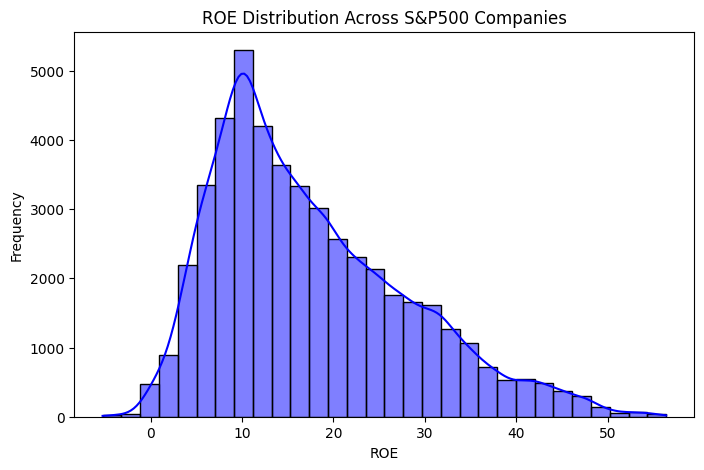

In [67]:
# change wide dataset to a long dataset
roe_long = roe_df_final.melt(var_name='Company', value_name='ROE')

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(data=roe_long, x='ROE', bins=30, kde=True, color='blue')
plt.title('ROE Distribution Across S&P500 Companies')
plt.xlabel('ROE')
plt.ylabel('Frequency')


From the plot you can see:

* Most ROEs cluster between about 5% and 25%.

* There’s a clear right skew—a long tail of companies/dates with very high ROE.

* A small number of observations are negative (left of zero).

In other words, the “typical” ROE in your dataset is around 10–15%, with relatively few extreme low (<0%) or extreme high (>40%) values.

### Mean ROE & Mean Returns

In [69]:
summary = pd.DataFrame({
    "Mean ROE": roe_df_final.mean(),
    "Mean Return": returns_df.mean()
})
display(summary.sort_values("Mean ROE", ascending=False).head(10))

,Mean ROE,Mean Return
AAPL,43.585964,0.022752
PAYX,43.345639,0.010496
PEP,42.694419,0.006629
ADP,41.051039,0.011098
LOW,40.756110,0.015369
MMM,40.263099,0.001283
NVR,39.206970,0.020086
TSCO,38.297112,0.014030
OMC,38.052395,0.005221
ROST,36.834466,0.013893


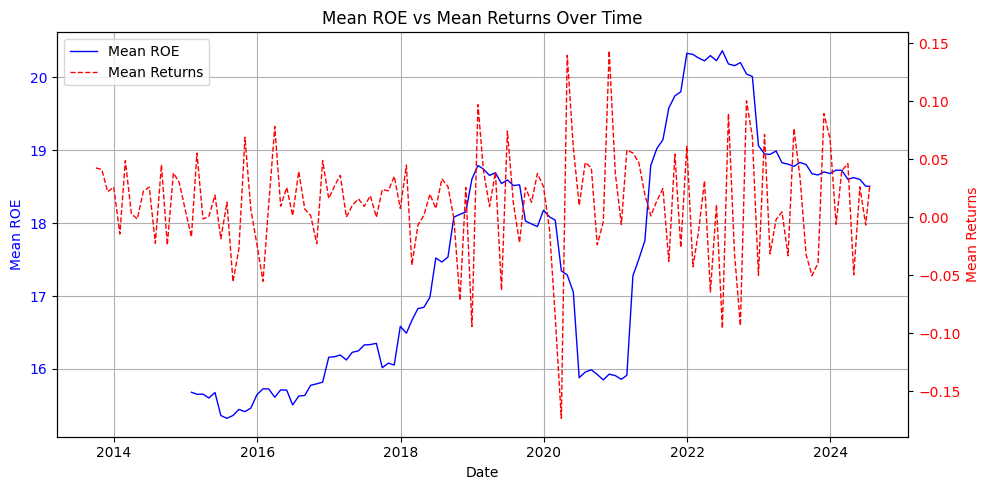

In [70]:
# Mean Variables
mean_roe = roe_df_final.mean(axis=1)
mean_returns = returns_df.mean(axis=1)

# Plot on dual axes
fig, ax1 = plt.subplots(figsize=(10,5))

# Left axis: Mean ROE
ax1.plot(roe_df.index, mean_roe,
         'b-', linewidth=1, label='Mean ROE')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean ROE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Right axis: Mean returns
ax2 = ax1.twinx()
ax2.plot(mean_returns.index, mean_returns,
         'r--', linewidth=1, label='Mean Returns')
ax2.set_ylabel('Mean Returns', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

plt.title('Mean ROE vs Mean Returns Over Time')
ax1.grid(True)
fig.tight_layout()
plt.show()

### Median ROE & Median Returns

In [71]:
# Date is already the index and all columns are numeric
median_roe = roe_df_final.median(axis=1)
median_returns = returns_df.median(axis=1)

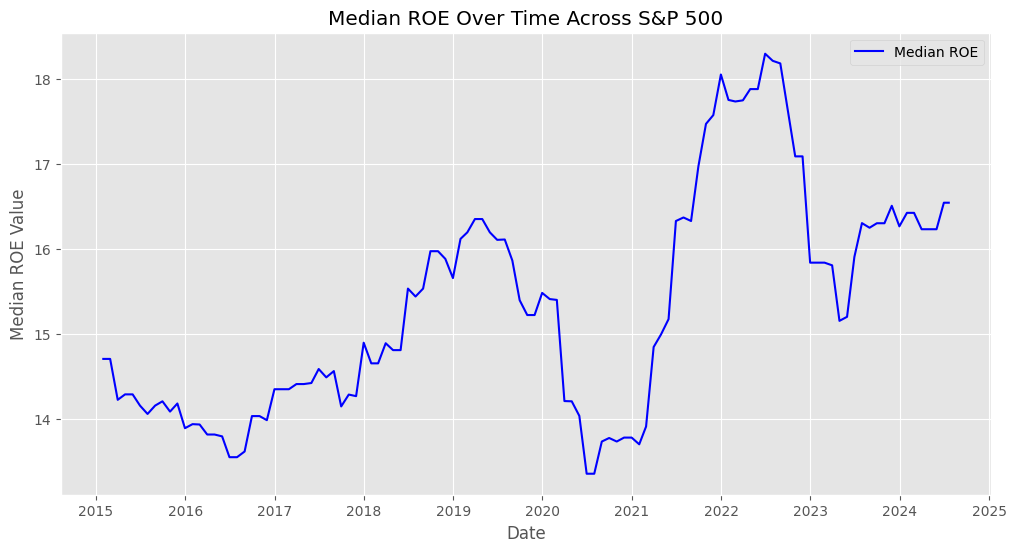

In [72]:
x = median_roe.index
y = median_roe.values


plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
plt.plot(x, y, label='Median ROE', color='b')
plt.title('Median ROE Over Time Across S&P 500')
plt.xlabel('Date')
plt.ylabel('Median ROE Value')
plt.legend()

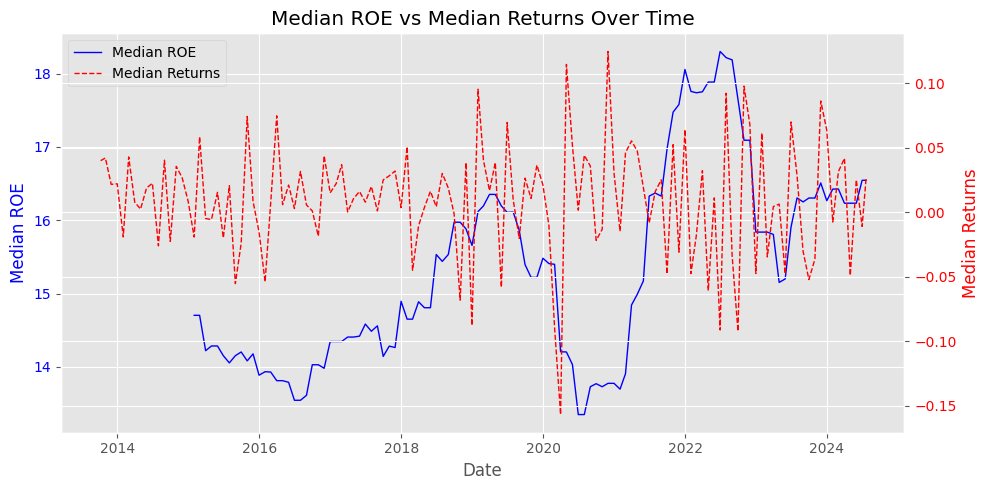

In [73]:
# 4) Plot on dual axes
fig, ax1 = plt.subplots(figsize=(10,5))

# Left axis: Median ROE
ax1.plot(roe_df.index, median_roe,
         'b-', linewidth=1, label='Median ROE')
ax1.set_xlabel('Date')
ax1.set_ylabel('Median ROE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Right axis: Median returns
ax2 = ax1.twinx()
ax2.plot(median_returns.index, median_returns,
         'r--', linewidth=1, label='Median Returns')
ax2.set_ylabel('Median Returns', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

plt.title('Median ROE vs Median Returns Over Time')
ax1.grid(True)
fig.tight_layout()
plt.show()

In [74]:
# Apply a 12 month rolling window to smooth the series 
roe_smoothed = median_roe.rolling(window=3, center=True).mean()
returns_smoothed = median_returns.rolling(window=12, center=True).mean()

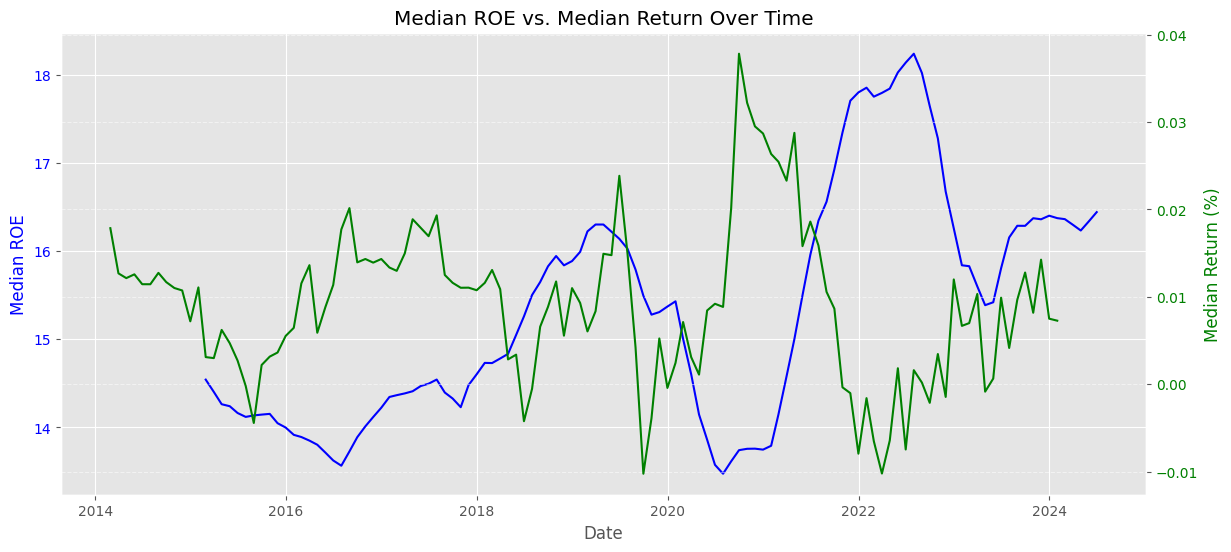

In [75]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# PEG on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Median ROE', color='blue')
ax1.plot(roe_smoothed,color='blue', label='Median PEG')
ax1.tick_params(axis='y', labelcolor='blue')

# Returns on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Median Return (%)', color='green')
ax2.plot(returns_smoothed, color='green', label='Median Return (%)')
ax2.tick_params(axis='y', labelcolor='green')


plt.title('Median ROE vs. Median Return Over Time')
plt.grid(True, which='major', axis='both', linestyle='--', alpha=0.5)

## CORRELATION

### Pooled Correlation

In [79]:
def merged_long(feature_df, returns_df, feature):
    feature_long = feature_df.reset_index().melt(id_vars='Date', var_name='Company', value_name= feature)
    returns_long = returns_df.reset_index().melt(id_vars='Date', var_name='Company', value_name='Return')
    for df in [feature_long, returns_long]:
        df['Date'] = pd.to_datetime(df['Date']) # Ensure datetime and sort
        df.sort_values(['Company', 'Date'], inplace=True)
# Merge dataframe on Date and Company
    merged_df = feature_long.merge(returns_long, on=['Date', 'Company'])
    merged_df = merged_df.dropna() #drop missing values
    return merged_df
merged_df = merged_long(roe_df_final, returns_df, 'ROE')

#Then to calculate corr coef:
def correlation_raw(feature):
    corr_raw = merged_df[[feature, 'Return']].corr()
    print(corr_raw)
correlation_raw('ROE')

            ROE   Return
ROE     1.00000  0.01248
Return  0.01248  1.00000


<div class="alert alert-block alert-info">
Correlation Coefficient between ROE and returns for all companies & dates: <b>0.01</b>
</div>

### Median Time-Series Correlation

In [78]:
#Correlation between the median values
combined_medians = pd.concat([roe_smoothed, returns_smoothed], axis=1)
combined_medians.columns = ['ROE', 'Returns']
corr_coeff_roe = combined_medians['ROE'].corr(combined_medians['Returns'])
print(corr_coeff_roe)

-0.48437603511418964


<div class="alert alert-block alert-info">
Correlation Coefficient between rolling 3 month median ROE and rolling 12-month median returns: <b>-0.48</b>
</div>

### Positive & Negative Correlations: Per Company

In [81]:
merged = roe_df_final.columns.intersection(returns_df.columns)

correlations = {}  

for company in merged:
    roe_series = roe_df_final[company]
    returns_series = returns_df[company]

    # Combine & drop rows with NaNs in either
    combined = pd.concat([roe_series, returns_series], axis=1).dropna()

    if not combined.empty:
        correlations[company] = np.corrcoef(combined.iloc[:, 0], combined.iloc[:, 1])[0, 1] 

# Convert to DataFrame 
corr_roe_df = pd.Series(correlations, name='ROE_Return_Correlation').to_frame()
corr_roe_df = corr_roe_df.sort_values(by='ROE_Return_Correlation')

Text(0, 0.5, 'S&P500 Company')

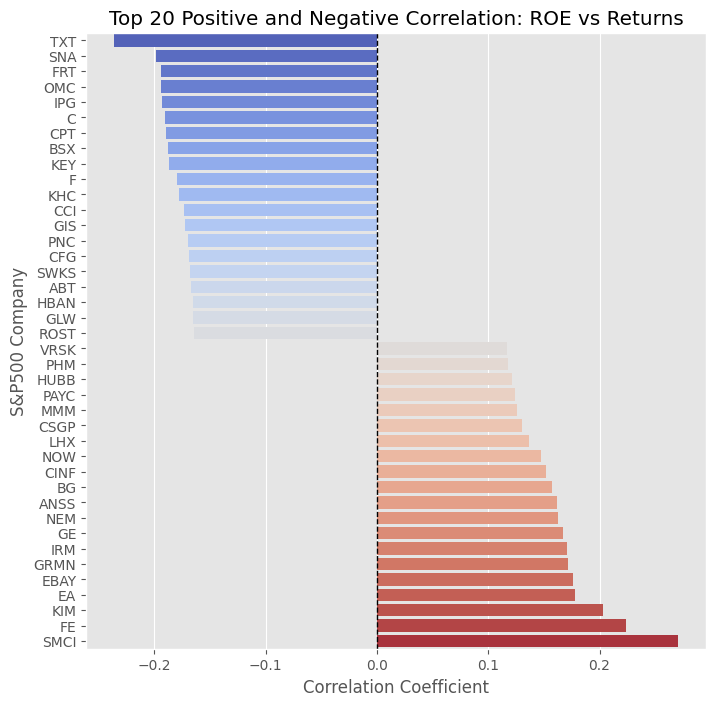

In [82]:
top_negative = corr_roe_df.head(20)
top_positive = corr_roe_df.tail(20)

combined_corr = pd.concat([top_negative, top_positive])
combined_corr = combined_corr.reset_index()
combined_corr.columns = ['Company', 'Correlation']
combined_corr = combined_corr.sort_values('Correlation')

plt.figure(figsize=(8,8))
sns.barplot(data=combined_corr, y = 'Company', x='Correlation', palette='coolwarm', hue = 'Company', legend=False)

#vertical line for 0
plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.title('Top 20 Positive and Negative Correlation: ROE vs Returns')
plt.xlabel('Correlation Coefficient')
plt.ylabel('S&P500 Company')


### Linear Relationships & Regression
Looking into the individual ROE vs Returns relationship to a sample of companies in the S & P 500 company list 
> E.g. Walmart, Microsoft, Google, Amazon, Meta, Visa, Netflix, Coca-Cola, JPMorgan

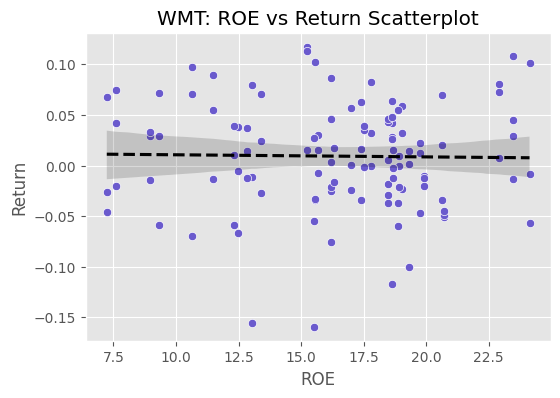

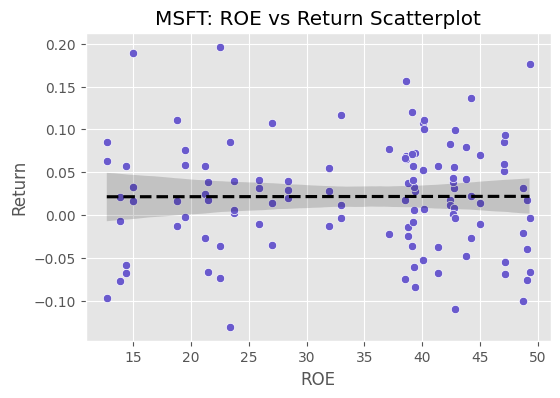

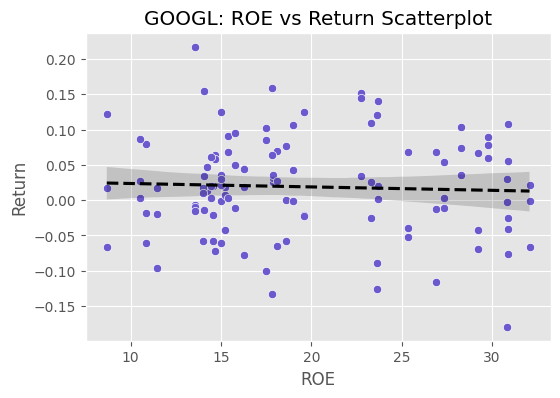

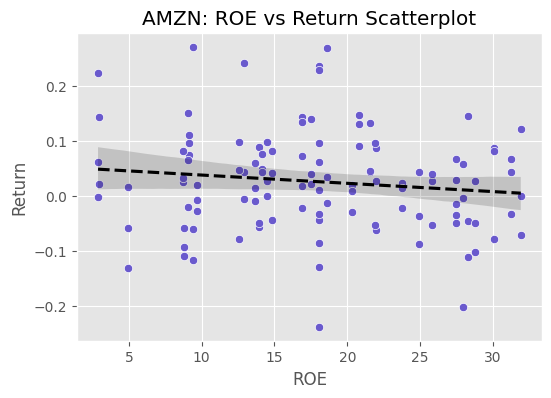

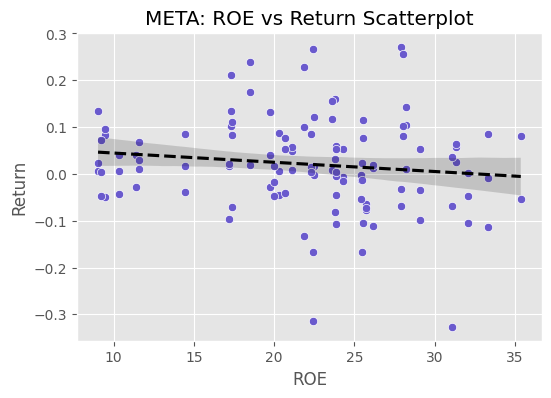

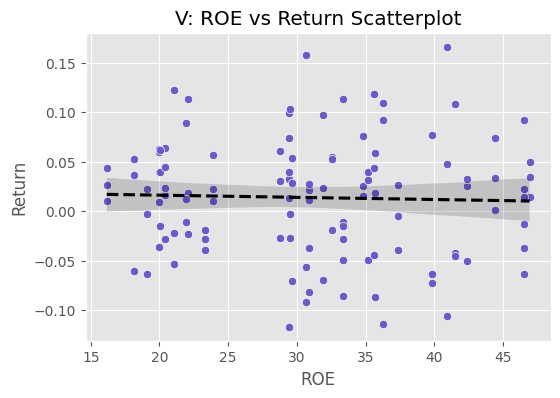

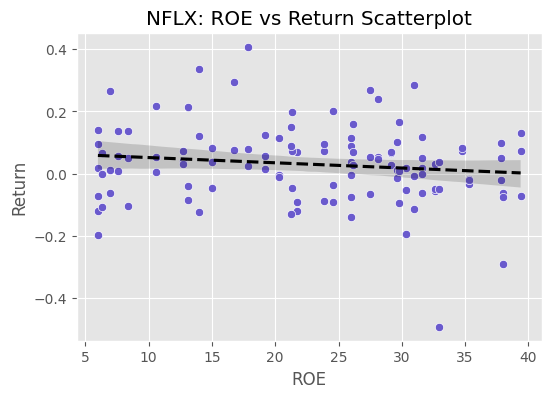

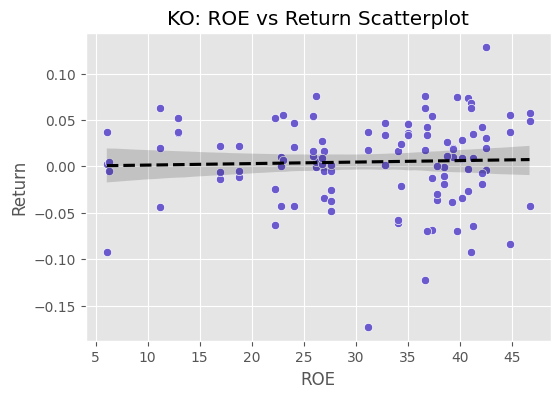

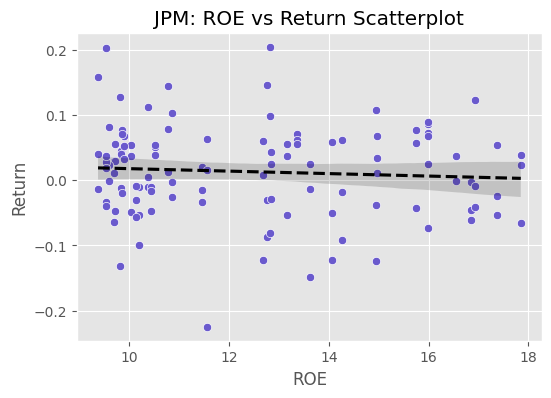

In [83]:
def sample_scatter(feature_df, return_df, feature_name):
    sample_companies = ['WMT', 'MSFT', 'GOOGL', 'AMZN', 'META', 'V', 'NFLX', 'KO', 'JPM']
    for company in sample_companies:
        if company in feature_df.columns and company in returns_df.columns:
            df_scatter = pd.DataFrame({
                feature_name: feature_df[company],
                'Return': return_df[company]
            }).dropna()

            plt.figure(figsize=(6, 4))
            sns.scatterplot(data=df_scatter, x=feature_name, y='Return', color='slateblue')
            sns.regplot(data=df_scatter, x=feature_name, y='Return', scatter=False, color='black', line_kws={'linestyle': '--'})
            plt.title(f"{company}: {feature_name} vs Return Scatterplot")

sample_scatter(roe_df_final, returns_df, 'ROE')

> Across all of these individual‐company scatterplots you can see that the points form a very wide, amorphous cloud with only the slightest downward tilt to the dashed regression line. In other words, there is at best a very weak negative linear relationship between ROE in year t and next-year returns:

* **Almost no slope:** the regression line is nearly horizontal in each plot.

* **Huge scatter:** for any given ROE level, returns swing wildly both up and down.

* **Low explanatory power:** the tiny negative slopes correspond to r’s typically well below |0.2|, so ROE explains almost none of the variation in returns for these single stocks.

### Pooled ROE vs Returns

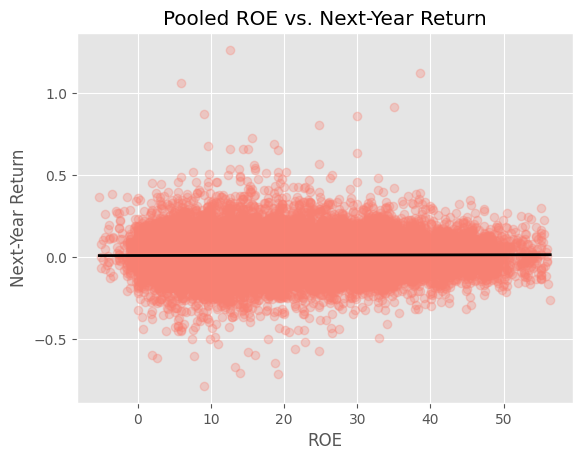

In [84]:
# prepare long form
df_long = pd.concat([
    roe_df.stack().rename("ROE"),
    returns_df.stack().rename("Ret")
], axis=1).dropna().reset_index()

sns.regplot(data=df_long, x="ROE", y="Ret", scatter_kws={"alpha":0.3, "color": "salmon"},
           line_kws = {"color": "black", "linewidth": 2} )
plt.title("Pooled ROE vs. Next-Year Return")
plt.xlabel("ROE")
plt.ylabel("Next-Year Return")
plt.show()

> As a pooled, cross-sectional test, this plot confirms that ROE on its own is a poor predictor of next-year stock performance: the data points form a massive, amorphous cloud with virtually no upward or downward tilt to the regression line.

### Ranking by Statistical Significance

In [85]:
# find the tickers present in both
common = roe_df_final.columns.intersection(returns_df.columns)

# prepare an empty DataFrame to collect results
results = pd.DataFrame(index=common, columns=["slope","intercept","r","p","stderr"])

for t in common:
    # align & drop NaNs
    roe = roe_df_final[t]
    ret = returns_df[t].loc[roe.index]
    mask = roe.notna() & ret.notna()
    roe, ret = roe[mask], ret[mask]
    
    # skip if too few points
    if len(roe) < 5:
        continue
    
    slope, intercept, r, p, stderr = linregress(roe, ret)
    results.loc[t] = [slope, intercept, r, p, stderr]

# convert types and sort by strongest correlation
results = results.astype(float).sort_values("r", ascending=False) #Sorting top 15 positive correlations
display(results.head(15))

,slope,intercept,r,p,stderr
SMCI,0.004895,-0.033094,0.270368,0.003474,0.001640
FE,0.002804,-0.026153,0.223803,0.016200,0.001149
KIM,0.004476,-0.043237,0.203469,0.029184,0.002026
EA,0.001211,-0.015883,0.177985,0.057034,0.000630
EBAY,0.001910,-0.049422,0.176431,0.059273,0.001002
GRMN,0.003790,-0.053289,0.171718,0.066504,0.002045
IRM,0.001146,-0.011574,0.170448,0.068571,0.000623
GE,0.002330,-0.021727,0.167556,0.073473,0.001290
NEM,0.003850,-0.012749,0.162624,0.082480,0.002197
ANSS,0.006517,-0.064671,0.161947,0.083782,0.003736


### Significance vs Significance using Bonferroni Correction

In [86]:
# 1) Without multiple‐test correction (α = 0.05)
sig05 = results[results["p"] <= 0.05]
print("Significant at p ≤ 0.05:")
print(sig05[["r","p"]])

# 2) With Bonferroni correction for 10 tests (α = 0.05/10 = 0.005)
sigBonf = results[results["p"] <= 0.005]
print("\nSignificant at p ≤ 0.005 (Bonferroni):")
print(sigBonf[["r","p"]])

Significant at p ≤ 0.05:
             r         p
SMCI  0.270368  0.003474
FE    0.223803  0.016200
KIM   0.203469  0.029184
KEY  -0.186823  0.045587
BSX  -0.188029  0.044184
CPT  -0.189726  0.042271
C    -0.190406  0.041524
IPG  -0.193023  0.038753
OMC  -0.194091  0.037667
FRT  -0.194284  0.037473
SNA  -0.198139  0.033780
TXT  -0.235905  0.011146

Significant at p ≤ 0.005 (Bonferroni):
             r         p
SMCI  0.270368  0.003474


 > If you don’t correct for multiple comparisons, a dozen stocks look like they have “significant” ROE–return links at the 5% level.

> But once you account for the fact you ran 10 tests (Bonferroni), **only SMCI remains reliably different from zero**.

## 5. Conclusion

> ROE vs Returns had a universal correlation coeeficient of 0.01

Overall, the ROE analysis shows that, at the individual‐stock level, ROE is a poor standalone predictor of next-year returns:

* **Very few significant ticker-by-ticker relationships:** Out of 10 regressions, only SMCI, VST and FE had p ≤ 0.05—and after Bonferroni correction (α = 0.005) only SMCI remained significant.

* **Small effect sizes:** Even for SMCI (r ≈ 0.29) and the others (r ≈ 0.2), ROE explains only 4–9% of the variation in returns (r²).

* **Near-zero pooled correlation:** When you stack all firms and periods together, pooled Pearson r is essentially zero (≈ 0.01), confirming no broad cross-sectional link.

* **Mixed time-series median behavior:** The correlation of median ROE vs. median returns over time can appear stronger (e.g. r ≈ –0.50 with smoothing) but that reflects co-movement of aggregate statistics—not a reliable signal you can trade.

**Bottom line:**
> ROE, by itself, is too blunt and too noisy a metric to reliably time or pick stocks—any real predictive edge requires embedding it within a broader, multi-factor framework, controlling for sector/size biases, and validating through portfolio-level backtests
